In [2]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle

In [3]:
coindata = pd.read_csv("data/r76_events_coincidencepeak.txt", skiprows=3, engine='python',skipfooter=1,sep="*",skipinitialspace=True, \
            index_col=False, \
            names=['garbage','Row','SeriesNumber','EventNumber','PTOFdelay','pt_keVee'], \
            delim_whitespace=False)


print (coindata.head(10))
print (coindata.tail(10))


   garbage   Row  SeriesNumber  EventNumber  PTOFdelay    pt_keVee
0      NaN  1561   72209162200        20309         56   48.724426
1      NaN  2450   72209162200        30273         15  199.859146
2      NaN  3438   72209162200        40339         50   10.346083
3      NaN  4270   72209162200        50269         14   40.072876
4      NaN  5046   72209162200        60108         67   21.741763
5      NaN  5787   72209162200        60849         21   17.185294
6      NaN  5848   72209162200        70006         25  166.384586
7      NaN  6823   72209162200        80047          9  191.283417
8      NaN  7083   72209162200        80307         46   11.980396
9      NaN  8926   72209162200       100246         66   17.653014
      garbage      Row  SeriesNumber  EventNumber  PTOFdelay    pt_keVee
2313      NaN  1374581   72209172155      2020326         -6    5.112734
2314      NaN  1374846   72209172155      2020591         41   29.666429
2315      NaN  1375554   72209172155      20

In [4]:
series = np.asarray(coindata['SeriesNumber'])
ev = np.asarray(coindata['EventNumber'])
EkeV = np.asarray(coindata['pt_keVee'])
PTOFdelay = np.asarray(coindata['PTOFdelay'])

(-100.0, 100.0)

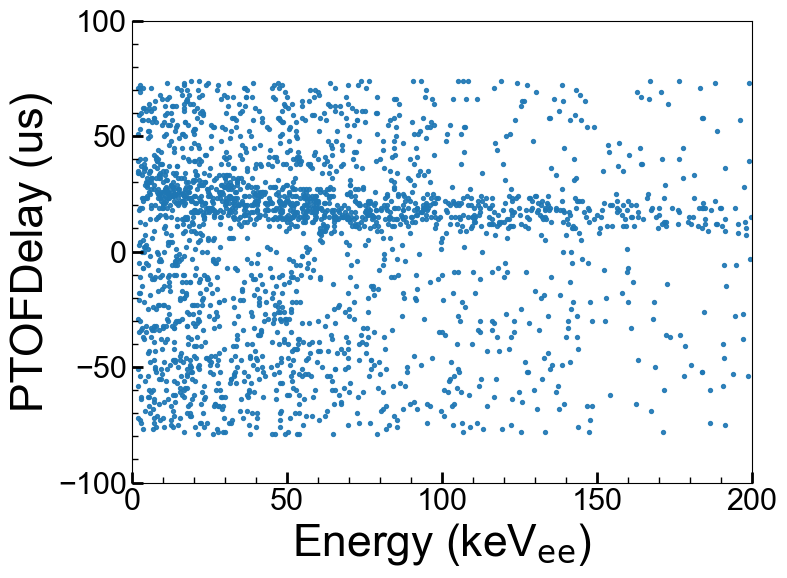

In [5]:
fig, axs = plt.subplots(1,1,figsize=(8,6))
# the ER-band fit
ax1 = axs

ax1.scatter(EkeV, PTOFdelay, marker='o', alpha=0.9, s=8)


# plot the data
#ax1.errorbar(ER_data['Erecoil'], ER_data['sigma'], yerr=ER_data['sigma_err'], fmt="o", label="data")


#ax1.plot(E_recoil_arr, sig_er_func(E_recoil_arr), label="Edelweiss ER resolution, C=0.0313")
ax1.set(xlabel="Energy (keV$_{\mathrm{ee}}$)", ylabel="PTOFDelay (us)")

    
plt.xlim(0, 200)
plt.ylim(-100,100)

In [6]:
#grabbing series numbers with energy < 50keV
low_energy_series = []

for i in range(0, len(EkeV)):
    if EkeV[i] < 50:
        low_energy_series.append(series[i])
        
#print(low_energy_series)
print(len(low_energy_series))

1156


In [14]:
#find the energy in keV of a specific event
series_num = 72209162200 
event_num = 30273

for i in range(0, len(series)):
    if series[i] == series_num:
        if ev[i] == event_num:
            print(EkeV[i])

199.8591456539
